In [1]:
pip install opencv-python numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


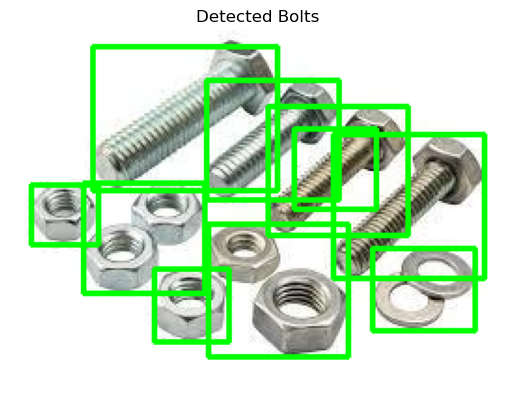

Estimated Bolt Lengths (in pixels): [40, 55, 75, 36, 65, 81, 44, 75, 71, 99]


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread(r'C:\Users\pps_c\Downloads\images.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges
edges = cv2.Canny(gray, 50, 150)

# Find external contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

bolt_lengths = []

# Loop through contours
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 30 and h > 30:  # Filter out small shapes
        bolt_lengths.append(max(w, h))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Bolts")
plt.axis("off")
plt.show()

# Print the estimated bolt lengths
print("Estimated Bolt Lengths (in pixels):", bolt_lengths)


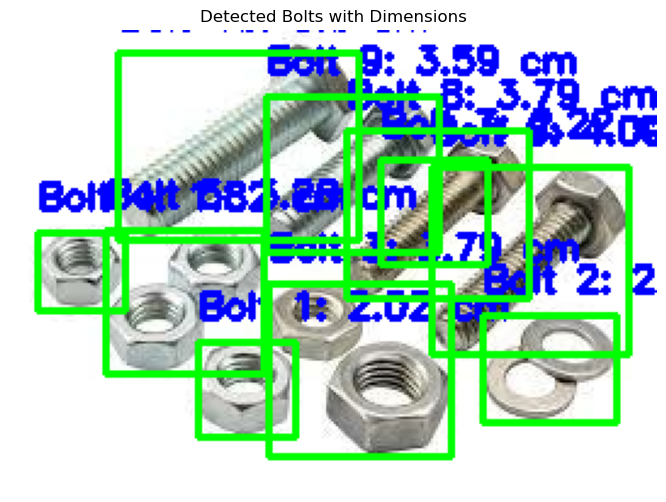


📏 Estimated Bolt Lengths:
  Bolt 1: 40 px ≈ 2.02 cm ≈ 0.0202 m
  Bolt 2: 55 px ≈ 2.78 cm ≈ 0.0278 m
  Bolt 3: 75 px ≈ 3.79 cm ≈ 0.0379 m
  Bolt 4: 36 px ≈ 1.82 cm ≈ 0.0182 m
  Bolt 5: 65 px ≈ 3.28 cm ≈ 0.0328 m
  Bolt 6: 81 px ≈ 4.09 cm ≈ 0.0409 m
  Bolt 7: 44 px ≈ 2.22 cm ≈ 0.0222 m
  Bolt 8: 75 px ≈ 3.79 cm ≈ 0.0379 m
  Bolt 9: 71 px ≈ 3.59 cm ≈ 0.0359 m
  Bolt 10: 99 px ≈ 5.0 cm ≈ 0.05 m

✅ Image saved: detected_bolts_annotated.jpg
✅ CSV saved: bolt_length_report.csv


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Load the Image ===
image_path = r'C:\Users\pps_c\Downloads\images.jpg'
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image not found. Please check the path.")
original = image.copy()

# === Convert to Grayscale and Detect Edges ===
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

# === Find Contours ===
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

bolt_lengths_px = []
bounding_boxes = []

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 30 and h > 30:
        bolt_lengths_px.append(max(w, h))
        bounding_boxes.append((x, y, w, h))

# === Conversion: Assume Longest Bolt is 5.0 cm ===
if not bolt_lengths_px:
    print("No bolts detected.")
    exit()

scale = 5.0 / max(bolt_lengths_px)
bolt_lengths_cm = [round(px * scale, 2) for px in bolt_lengths_px]
bolt_lengths_m = [round(cm / 100, 4) for cm in bolt_lengths_cm]

# === Annotate Detected Bolts ===
for i, ((x, y, w, h), cm) in enumerate(zip(bounding_boxes, bolt_lengths_cm), 1):
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    label = f"Bolt {i}: {cm} cm"
    cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# === Show Annotated Image ===
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Bolts with Dimensions")
plt.axis("off")
plt.show()

# === Save Annotated Image and CSV ===
cv2.imwrite(r'C:\Users\pps_c\Downloads\detected_bolts_annotated.jpg', image)

df = pd.DataFrame({
    "Bolt ID": range(1, len(bolt_lengths_px) + 1),
    "Length (px)": bolt_lengths_px,
    "Length (cm)": bolt_lengths_cm,
    "Length (m)": bolt_lengths_m
})
df.to_csv(r'C:\Users\pps_c\Downloads\bolt_length_report.csv', index=False)

# === Print Summary ===
print("\n📏 Estimated Bolt Lengths:")
for i, (px, cm, m) in enumerate(zip(bolt_lengths_px, bolt_lengths_cm, bolt_lengths_m), 1):
    print(f"  Bolt {i}: {px} px ≈ {cm} cm ≈ {m} m")

print("\n✅ Image saved: detected_bolts_annotated.jpg")
print("✅ CSV saved: bolt_length_report.csv")
